In [1]:
from fileData import *
from netEnv import *
from dqnAgent import *

code_path = ".."
requiredFields = ['FileCount', 'AvgFileSize', 'BufSize', 'Bandwidth', 'AvgRtt', 'CC_Level', 'P_Level', 'PP_Level',
                  'numActiveCores', 'frequency', 'TotalAvgTput', 'TotalEnergy', 'DataTransferEnergy']
LabelName = 'TotalAvgTput'
fileData_chameleon = ReadFile(code_path + '/Dataset/Chameleon_Combined_all.csv', requiredFields)
filedata_grouped_df = fileData_chameleon.get_grouped_df()
filedata_keys=[key for key, _ in filedata_grouped_df]
for key in fileData_chameleon.group_keys:
    print(key)
print(len(fileData_chameleon.group_keys))

def validation(action,env,TOTAL_EPISODES_VALIDATION=3):
    print("validating for", env.environment_group_identification)
    reward_per_episode_validation=[]
    action_list_per_episode=[]
    for episode in range(TOTAL_EPISODES_VALIDATION):
        obs=env.reset()
        done=False
        episode_reward=0
        action_list=[]
        while(done==False):
            action=action
            action_list.append(action)
            new_obs,rew,done, _ =env.step(action)
            episode_reward+=rew
            obs=new_obs
        reward_per_episode_validation.append(episode_reward)
        action_list_per_episode.append(action_list)
    return reward_per_episode_validation,action_list_per_episode

(32, 35, 40, 10, 30)
(32, 35, 40, 10, 40)
(32, 35, 40, 10, 50)
(32, 223, 40, 10, 30)
(32, 223, 40, 10, 40)
(32, 223, 40, 10, 50)
(32, 223, 40, 10, 60)
(32, 223, 40, 10, 70)
(32, 223, 40, 10, 80)
(32, 223, 40, 10, 90)
(64, 223, 40, 10, 30)
(64, 223, 40, 10, 40)
(64, 223, 40, 10, 60)
(128, 223, 40, 10, 30)
(128, 223, 40, 10, 40)
(250, 2, 40, 10, 30)
(250, 2, 40, 10, 40)
(250, 2, 40, 10, 50)
(250, 2, 40, 10, 60)
(250, 2, 40, 10, 70)
(250, 2, 40, 10, 80)
(250, 2, 40, 10, 90)
(500, 0, 40, 10, 30)
(500, 0, 40, 10, 40)
(500, 101, 40, 10, 30)
(500, 101, 40, 10, 40)
(500, 101, 40, 10, 50)
(500, 101, 40, 10, 70)
(500, 101, 40, 10, 80)
(500, 101, 40, 10, 90)
(2500, 2, 40, 10, 30)
(2500, 2, 40, 10, 40)
(2500, 2, 40, 10, 50)
(10000, 0, 40, 10, 30)
34


In [2]:
key=7
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[key:key+1],0)
print("###################")
print(environmentG1.key_state_dictionary[fileData_chameleon.group_keys[key]],len(environmentG1.key_state_dictionary[fileData_chameleon.group_keys[key]]))
print("###################")

print("###################")
print(environmentG1.key_max_throughput_dictionary[fileData_chameleon.group_keys[key]])
print(environmentG1.key_max_throughput_parameters[fileData_chameleon.group_keys[key]])
print(environmentG1.key_group_identification[fileData_chameleon.group_keys[key]])
print(environmentG1.key_group_number_of_rows[fileData_chameleon.group_keys[key]])
print(environmentG1.return_action_list(fileData_chameleon.group_keys[key]),len(environmentG1.return_action_list(fileData_chameleon.group_keys[key])))
print(environmentG1.return_global_action_list(),len(environmentG1.return_global_action_list()))
print("###################")

###################
[[32, 223, 40, 10, 70, 16, 1, 16], [32, 223, 40, 10, 70, 16, 1, 20], [32, 223, 40, 10, 70, 20, 1, 8], [32, 223, 40, 10, 70, 24, 1, 1], [32, 223, 40, 10, 70, 24, 1, 20], [32, 223, 40, 10, 70, 28, 1, 8], [32, 223, 40, 10, 70, 28, 1, 20], [32, 223, 40, 10, 70, 32, 1, 24], [32, 223, 40, 10, 70, 32, 1, 32]] 9
###################
###################
4306.0942
(24.0, 1.0, 1.0)
(32, 223, 40, 10, 70)
9
[(16, 1, 16), (16, 1, 20), (20, 1, 8), (24, 1, 1), (24, 1, 20), (28, 1, 8), (28, 1, 20), (32, 1, 24), (32, 1, 32)] 9
[(16, 1, 16), (16, 1, 20), (20, 1, 8), (24, 1, 1), (24, 1, 20), (28, 1, 8), (28, 1, 20), (32, 1, 24), (32, 1, 32)] 9
###################


In [3]:
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:8],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:8])
env.reset_group_specific(key)
print("###################")
print(env.get_max_throughput())
print(env.max_throughput_parameters)
print(env.environment_group_identification)
print(env.states,len(env.states))
print("###################")
for action in range (0,len(env.actions)):
    print(env.step(action),"action",action,env.actions[action])
    env.reset_group_specific(key)
print("###################")

###################
4306.0942
(24.0, 1.0, 1.0)
(32, 223, 40, 10, 70)
[[32, 223, 40, 10, 70, 16, 1, 16], [32, 223, 40, 10, 70, 16, 1, 20], [32, 223, 40, 10, 70, 20, 1, 8], [32, 223, 40, 10, 70, 24, 1, 1], [32, 223, 40, 10, 70, 24, 1, 20], [32, 223, 40, 10, 70, 28, 1, 8], [32, 223, 40, 10, 70, 28, 1, 20], [32, 223, 40, 10, 70, 32, 1, 24], [32, 223, 40, 10, 70, 32, 1, 32]] 9
###################
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 0 (1, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 1 (1, 1, 2)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 2 (1, 1, 4)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 3 (1, 1, 8)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 4 (1, 1, 16)
(array([ 32, 223,  40,  10,  70,  16,   1,  

In [4]:
selected_action=99
environment_validation=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:8],0)
env_validation=NetEnvironmentValidation(environment_validation,fileData_chameleon.group_keys[0:8],key)
env_validation.reset()
print("###################")
print(env_validation.get_max_throughput())
print(env_validation.max_throughput_parameters)
print(env_validation.environment_group_identification)
print(env_validation.actions,len(env_validation.actions))
print(env_validation.states,len(env.states))
print("###################")
for action in range (0,len(env_validation.actions)):
    print(env_validation.step(action),"action",action,env_validation.actions[action])
    env_validation.reset()
print("###################")
print("###################")
for action in range (0,len(env_validation.actions)):
    print(env_validation.step(action),"action",action,env_validation.actions[action])
    print(env_validation.step(selected_action),"action",selected_action,env_validation.actions[selected_action])
    env_validation.reset()
print("###################")

###################
4306.0942
(24.0, 1.0, 1.0)
(32, 223, 40, 10, 70)
[(1, 1, 1), (1, 1, 2), (1, 1, 4), (1, 1, 8), (1, 1, 16), (1, 1, 32), (2, 1, 1), (2, 1, 2), (2, 1, 4), (2, 1, 8), (2, 1, 16), (2, 1, 32), (4, 1, 1), (4, 1, 2), (4, 1, 4), (4, 1, 8), (4, 1, 16), (4, 1, 32), (8, 1, 1), (8, 1, 2), (8, 1, 4), (8, 1, 8), (8, 1, 16), (8, 1, 32), (16, 1, 1), (16, 1, 2), (16, 1, 4), (16, 1, 8), (16, 1, 16), (16, 1, 32), (32, 1, 1), (32, 1, 2), (32, 1, 4), (32, 1, 8), (32, 1, 16), (32, 1, 32), (1, 1, 3), (1, 1, 5), (1, 1, 9), (1, 1, 12), (1, 1, 19), (1, 1, 20), (1, 1, 24), (1, 1, 28), (1, 1, 31), (3, 1, 1), (3, 1, 3), (3, 1, 5), (3, 1, 9), (3, 1, 19), (3, 1, 31), (4, 1, 12), (4, 1, 20), (4, 1, 24), (4, 1, 28), (5, 1, 1), (5, 1, 3), (5, 1, 5), (5, 1, 9), (5, 1, 19), (5, 1, 31), (8, 1, 12), (8, 1, 20), (8, 1, 24), (8, 1, 28), (9, 1, 1), (9, 1, 3), (9, 1, 5), (9, 1, 9), (9, 1, 19), (9, 1, 31), (12, 1, 1), (12, 1, 4), (12, 1, 8), (12, 1, 12), (12, 1, 16), (12, 1, 20), (12, 1, 24), (12, 1, 28), (12,

(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 14 (4, 1, 4)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 15 (4, 1, 8)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 16 (4, 1, 16)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 17 (4, 1, 32)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) ac

(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 76 (12, 1, 20)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 77 (12, 1, 24)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 78 (12, 1, 28)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 79 (12, 1, 32)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 1

(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  32,   1,  24]), 0.6293760203852485, False, {'time': 1, 'max_time': 100}) action 125 (32, 1, 24)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 126 (32, 1, 28)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 127 (36, 1, 2)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2, 'max_time': 100}) action 99 (24, 1, 1)
(array([ 32, 223,  40,  10,  70,  16,   1,  16]), -0.5, False, {'time': 1, 'max_time': 100}) action 128 (36, 1, 4)
(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 1.0, False, {'time': 2

In [17]:
print(env_validation.reset())

[ 32 223  40  10  70  16   1  16]


validating for (32, 223, 40, 10, 70)


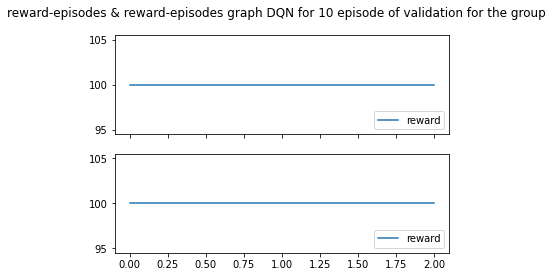

In [7]:
reward_per_episode_validation,action_list_per_episode=validation(selected_action,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()

In [8]:
print(env.reset())

[ 32 223  40  10  60   4   1  28]


In [9]:
print(env.step(99))

step:action not found for group  (32, 223, 40, 10, 60)  action  99 (24, 1, 1)
(array([ 32, 223,  40,  10,  60,   4,   1,  28]), -0.5, False, {'time': 1, 'max_time': 100})


In [10]:
agent=DQNAgent(env,EPSILON_DECAY=100)

step:action not found for group  (32, 35, 40, 10, 40)  action  0 (1, 1, 1)
step:action not found for group  (32, 35, 40, 10, 40)  action  1 (1, 1, 2)
step:action not found for group  (32, 35, 40, 10, 40)  action  2 (1, 1, 4)
step:action not found for group  (32, 35, 40, 10, 40)  action  3 (1, 1, 8)
step:action not found for group  (32, 35, 40, 10, 40)  action  4 (1, 1, 16)
step:action not found for group  (32, 35, 40, 10, 40)  action  5 (1, 1, 32)
step:action not found for group  (32, 35, 40, 10, 40)  action  6 (2, 1, 1)
step:action not found for group  (32, 35, 40, 10, 40)  action  7 (2, 1, 2)
step:action not found for group  (32, 35, 40, 10, 40)  action  8 (2, 1, 4)
step:action not found for group  (32, 35, 40, 10, 40)  action  9 (2, 1, 8)
step:action not found for group  (32, 35, 40, 10, 40)  action  10 (2, 1, 16)
step:action not found for group  (32, 35, 40, 10, 40)  action  11 (2, 1, 32)
step:action not found for group  (32, 35, 40, 10, 40)  action  12 (4, 1, 1)
step:action not fo

step:action not found for group  (32, 223, 40, 10, 60)  action  39 (1, 1, 12)
step:action not found for group  (32, 223, 40, 10, 60)  action  40 (1, 1, 19)
step:action not found for group  (32, 223, 40, 10, 60)  action  41 (1, 1, 20)
step:action not found for group  (32, 223, 40, 10, 60)  action  42 (1, 1, 24)
step:action not found for group  (32, 223, 40, 10, 60)  action  43 (1, 1, 28)
step:action not found for group  (32, 223, 40, 10, 60)  action  44 (1, 1, 31)
step:action not found for group  (32, 223, 40, 10, 60)  action  45 (3, 1, 1)
step:action not found for group  (32, 223, 40, 10, 60)  action  46 (3, 1, 3)
step:action not found for group  (32, 223, 40, 10, 60)  action  47 (3, 1, 5)
step:action not found for group  (32, 223, 40, 10, 60)  action  48 (3, 1, 9)
step:action not found for group  (32, 223, 40, 10, 60)  action  49 (3, 1, 19)
step:action not found for group  (32, 223, 40, 10, 60)  action  50 (3, 1, 31)
step:action not found for group  (32, 223, 40, 10, 60)  action  51 (

In [11]:
obs=agent.env.reset_group_specific(7)

In [19]:
obs

array([ 32, 223,  40,  10,  70,  24,   1,   1])

In [18]:
new_obs,rew,done, _ =agent.env.step(81)

In [20]:
print(new_obs,rew,done, _)

[ 32 223  40  10  70  16   1  20] 0.8056539153277233 False {'time': 2, 'max_time': 100}


In [21]:
transition=(obs,99,rew,done,new_obs)
print(transition)

(array([ 32, 223,  40,  10,  70,  24,   1,   1]), 99, 0.8056539153277233, False, array([ 32, 223,  40,  10,  70,  16,   1,  20]))


In [16]:
obs = new_obs

In [3]:
from fileData import *
from netEnv import *
from dqnAgent import *
import time


code_path = ".."
requiredFields = ['FileCount', 'AvgFileSize', 'BufSize', 'Bandwidth', 'AvgRtt', 'CC_Level', 'P_Level', 'PP_Level',
                  'numActiveCores', 'frequency', 'TotalAvgTput', 'TotalEnergy', 'DataTransferEnergy']
LabelName = 'TotalAvgTput'
fileData_chameleon = ReadFile(code_path + '/Dataset/Chameleon_Combined_all.csv', requiredFields)
filedata_grouped_df = fileData_chameleon.get_grouped_df()
filedata_keys=[key for key, _ in filedata_grouped_df]
print(filedata_keys)
print(len(filedata_keys))

[(32, 35, 40, 10, 30), (32, 35, 40, 10, 40), (32, 35, 40, 10, 50), (32, 223, 40, 10, 30), (32, 223, 40, 10, 40), (32, 223, 40, 10, 50), (32, 223, 40, 10, 60), (32, 223, 40, 10, 70), (32, 223, 40, 10, 80), (32, 223, 40, 10, 90), (64, 223, 40, 10, 30), (64, 223, 40, 10, 40), (64, 223, 40, 10, 60), (128, 223, 40, 10, 30), (128, 223, 40, 10, 40), (250, 2, 40, 10, 30), (250, 2, 40, 10, 40), (250, 2, 40, 10, 50), (250, 2, 40, 10, 60), (250, 2, 40, 10, 70), (250, 2, 40, 10, 80), (250, 2, 40, 10, 90), (500, 0, 40, 10, 30), (500, 0, 40, 10, 40), (500, 101, 40, 10, 30), (500, 101, 40, 10, 40), (500, 101, 40, 10, 50), (500, 101, 40, 10, 70), (500, 101, 40, 10, 80), (500, 101, 40, 10, 90), (2500, 2, 40, 10, 30), (2500, 2, 40, 10, 40), (2500, 2, 40, 10, 50), (10000, 0, 40, 10, 30)]
34


In [4]:
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:])
env.reset()
# agent=DQNAgent(env,EPSILON_DECAY=100)
agent=DQNAgent(env,EPSILON_DECAY=100,LOSS_TYPE='SL1')
t = time.time()
agent.warming_replay_buffer_prioritize()
print(f"warming up time is {time.time()- t} seconds")
agent.net_tensorboard()
t = time.time()
agent.training_only_from_replay_buffer(TRAINING_STEPS=50000)
print(f"training up time is {time.time()- t} seconds")

warming up memory with prioritization
warming up time is 16.411187887191772 seconds

step 0
loss tensor(1.7774, grad_fn=<SmoothL1LossBackward0>)

step 1000
loss tensor(3.3361e-06, grad_fn=<SmoothL1LossBackward0>)

step 2000
loss tensor(9.1773e-07, grad_fn=<SmoothL1LossBackward0>)

step 3000
loss tensor(4.6580e-07, grad_fn=<SmoothL1LossBackward0>)

step 4000
loss tensor(3.8529e-07, grad_fn=<SmoothL1LossBackward0>)

step 5000
loss tensor(5.6870e-07, grad_fn=<SmoothL1LossBackward0>)

step 6000
loss tensor(5.0245e-07, grad_fn=<SmoothL1LossBackward0>)

step 7000
loss tensor(5.3569e-07, grad_fn=<SmoothL1LossBackward0>)

step 8000
loss tensor(6.1529e-07, grad_fn=<SmoothL1LossBackward0>)

step 9000
loss tensor(5.0958e-07, grad_fn=<SmoothL1LossBackward0>)

step 10000
loss tensor(8.0579e-07, grad_fn=<SmoothL1LossBackward0>)

step 11000
loss tensor(7.2815e-07, grad_fn=<SmoothL1LossBackward0>)

step 12000
loss tensor(5.2235e-07, grad_fn=<SmoothL1LossBackward0>)

step 13000
loss tensor(5.4440e-07, 

######################################
###################
8191.376288
(16.0, 1.0, 8.0)
(32, 35, 40, 10, 30)
173
61
###################
validating for (32, 35, 40, 10, 30)


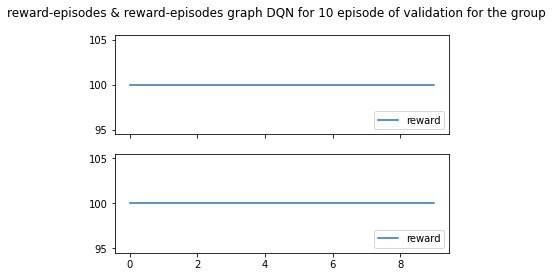

######################################
###################
7955.841507
(16.0, 1.0, 8.0)
(32, 35, 40, 10, 40)
173
61
###################
validating for (32, 35, 40, 10, 40)


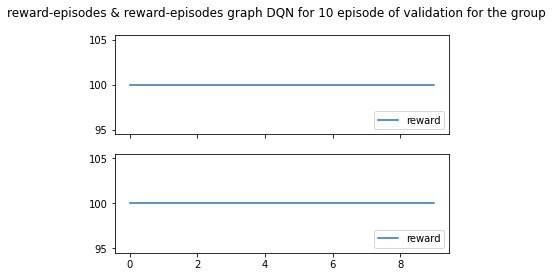

######################################
###################
7352.888952
(32.0, 1.0, 16.0)
(32, 35, 40, 10, 50)
173
61
###################
validating for (32, 35, 40, 10, 50)


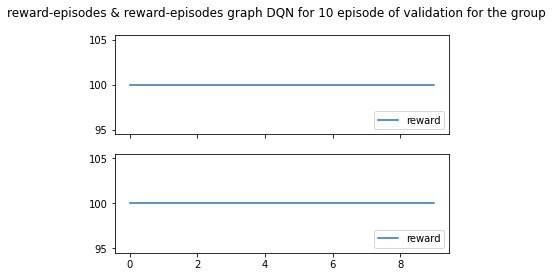

######################################
###################
8252.455316
(19.0, 1.0, 19.0)
(32, 223, 40, 10, 30)
173
61
###################
validating for (32, 223, 40, 10, 30)


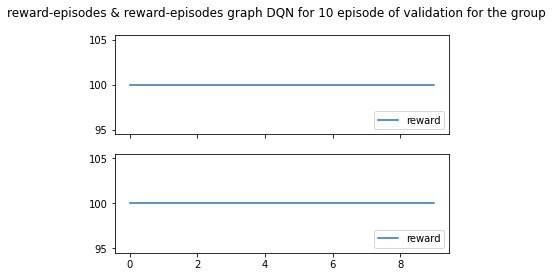

######################################
###################
8205.997721
(9.0, 1.0, 9.0)
(32, 223, 40, 10, 40)
173
61
###################
validating for (32, 223, 40, 10, 40)


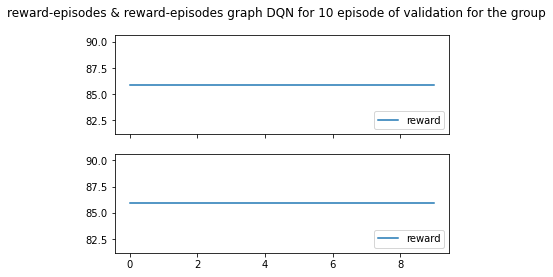

######################################
###################
7167.699856
(9.0, 1.0, 19.0)
(32, 223, 40, 10, 50)
173
61
###################
validating for (32, 223, 40, 10, 50)


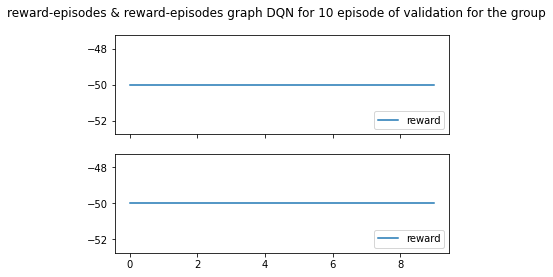

######################################
###################
5959.740866
(9.0, 1.0, 19.0)
(32, 223, 40, 10, 60)
173
61
###################
validating for (32, 223, 40, 10, 60)


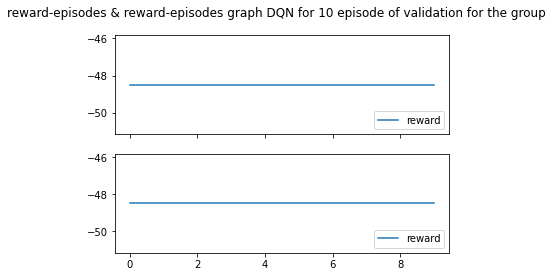

######################################
###################
4306.0942
(24.0, 1.0, 1.0)
(32, 223, 40, 10, 70)
173
61
###################
validating for (32, 223, 40, 10, 70)


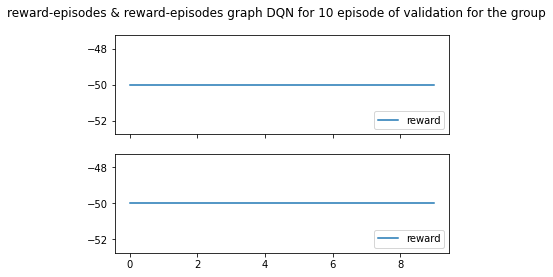

######################################
###################
3507.499349
(28.0, 1.0, 4.0)
(32, 223, 40, 10, 80)
173
61
###################
validating for (32, 223, 40, 10, 80)


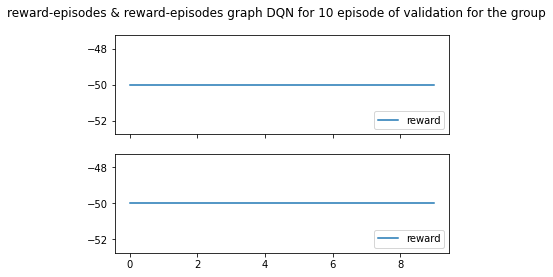

######################################
###################
4268.572345
(16.0, 1.0, 4.0)
(32, 223, 40, 10, 90)
173
61
###################
validating for (32, 223, 40, 10, 90)


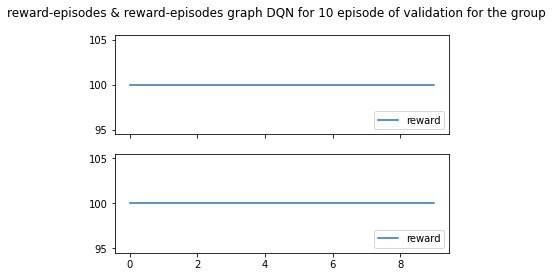

######################################
###################
8573.080062
(32.0, 1.0, 8.0)
(64, 223, 40, 10, 30)
173
61
###################
validating for (64, 223, 40, 10, 30)


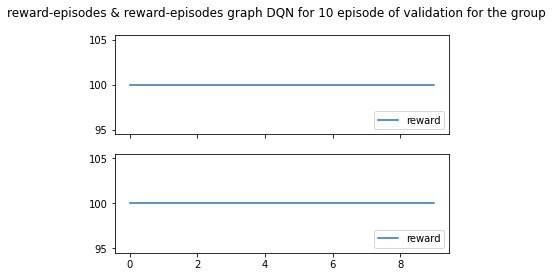

######################################
###################
5409.390035
(16.0, 1.0, 32.0)
(64, 223, 40, 10, 40)
173
61
###################
validating for (64, 223, 40, 10, 40)


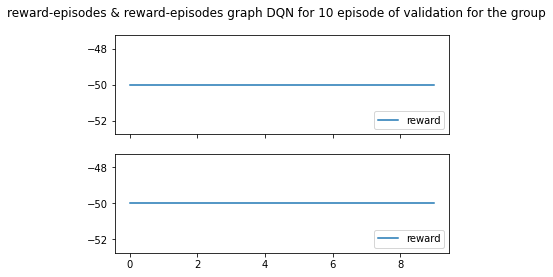

######################################
###################
4945.830356
(16.0, 1.0, 4.0)
(64, 223, 40, 10, 60)
173
61
###################
validating for (64, 223, 40, 10, 60)


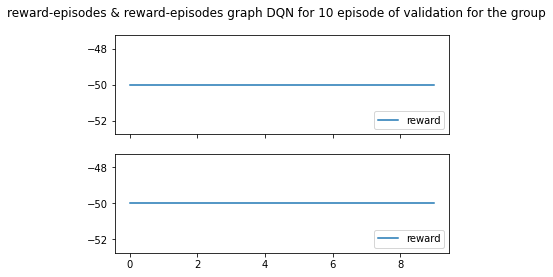

######################################
###################
8323.336886
(36.0, 1.0, 4.0)
(128, 223, 40, 10, 30)
173
61
###################
validating for (128, 223, 40, 10, 30)


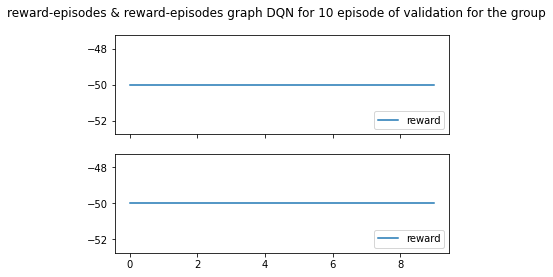

######################################
###################
6965.196311
(40.0, 1.0, 4.0)
(128, 223, 40, 10, 40)
173
61
###################
validating for (128, 223, 40, 10, 40)


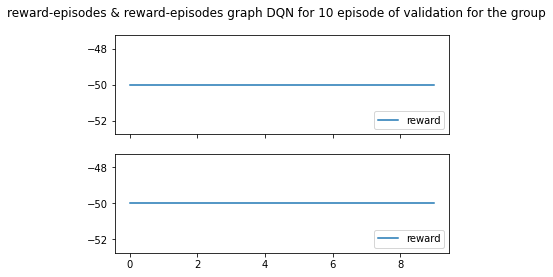

######################################
###################
4261.698165
(32.0, 1.0, 32.0)
(250, 2, 40, 10, 30)
173
61
###################
validating for (250, 2, 40, 10, 30)


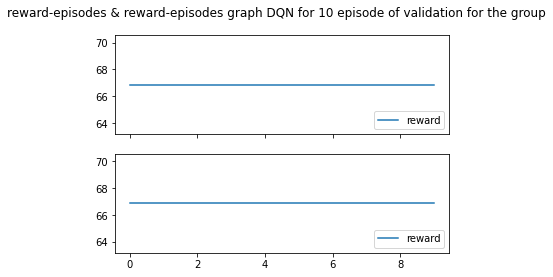

######################################
###################
2557.881591
(20.0, 1.0, 12.0)
(250, 2, 40, 10, 40)
173
61
###################
validating for (250, 2, 40, 10, 40)


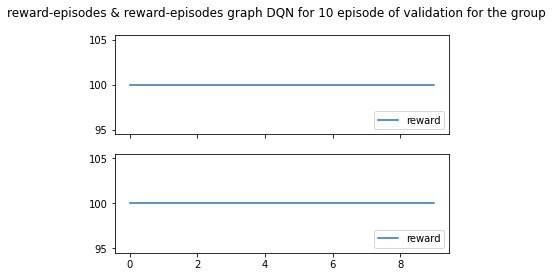

######################################
###################
2216.830712
(24.0, 1.0, 24.0)
(250, 2, 40, 10, 50)
173
61
###################
validating for (250, 2, 40, 10, 50)


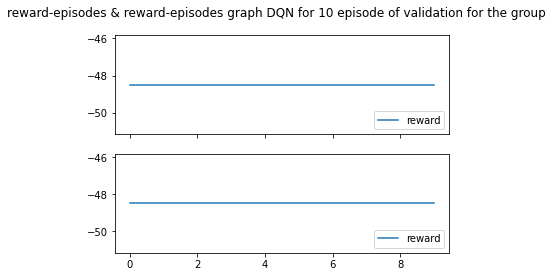

######################################
###################
2129.951127
(16.0, 1.0, 28.0)
(250, 2, 40, 10, 60)
173
61
###################
validating for (250, 2, 40, 10, 60)


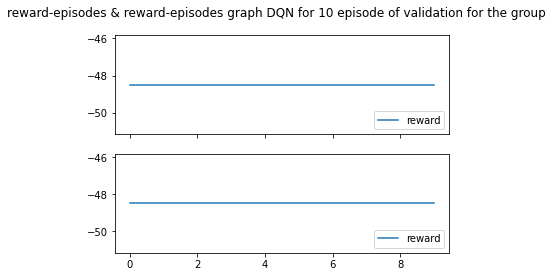

######################################
###################
1422.164891
(12.0, 1.0, 16.0)
(250, 2, 40, 10, 70)
173
61
###################
validating for (250, 2, 40, 10, 70)


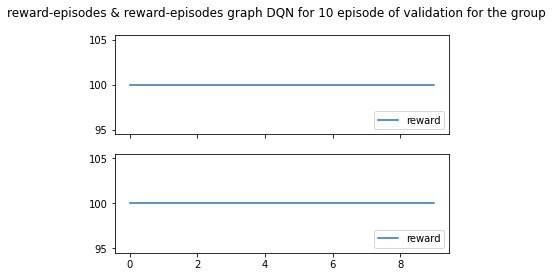

######################################
###################
2463.145236
(8.0, 1.0, 32.0)
(250, 2, 40, 10, 80)
173
61
###################
validating for (250, 2, 40, 10, 80)


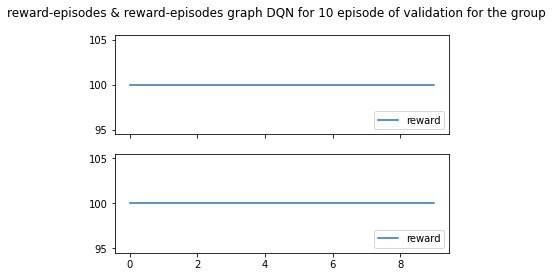

######################################
###################
2034.772151
(12.0, 1.0, 16.0)
(250, 2, 40, 10, 90)
173
61
###################
validating for (250, 2, 40, 10, 90)


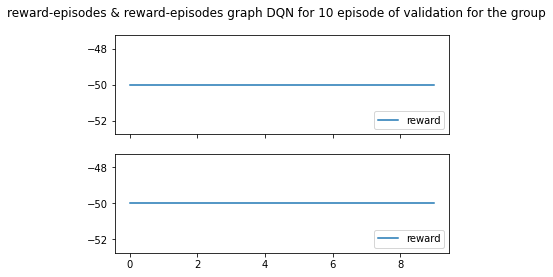

######################################
###################
431.4466555
(16.0, 1.0, 32.0)
(500, 0, 40, 10, 30)
173
61
###################
validating for (500, 0, 40, 10, 30)


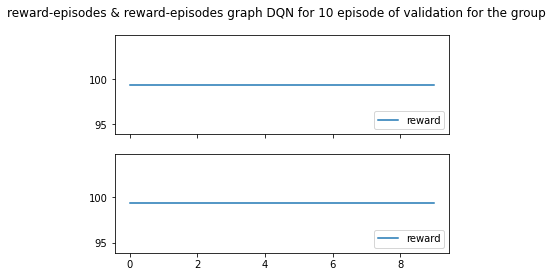

######################################
###################
134.2839168
(31.0, 1.0, 1.0)
(500, 0, 40, 10, 40)
173
61
###################
validating for (500, 0, 40, 10, 40)


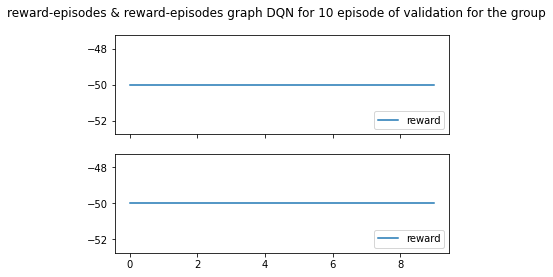

######################################
###################
504.0559707
(20.0, 1.0, 32.0)
(500, 101, 40, 10, 30)
173
61
###################
validating for (500, 101, 40, 10, 30)


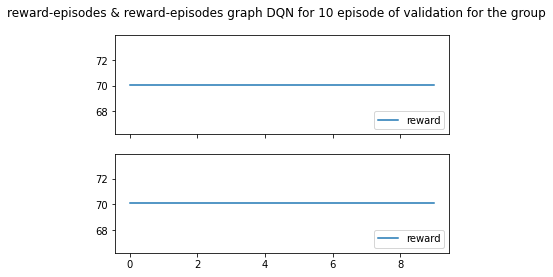

######################################
###################
319.4172303
(20.0, 1.0, 24.0)
(500, 101, 40, 10, 40)
173
61
###################
validating for (500, 101, 40, 10, 40)


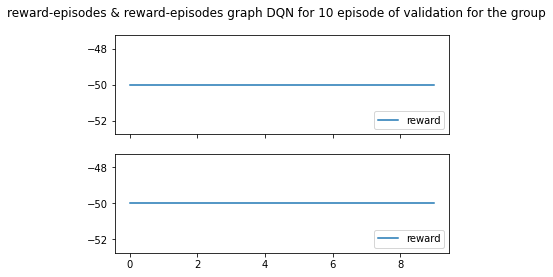

######################################
###################
255.612799
(12.0, 1.0, 28.0)
(500, 101, 40, 10, 50)
173
61
###################
validating for (500, 101, 40, 10, 50)


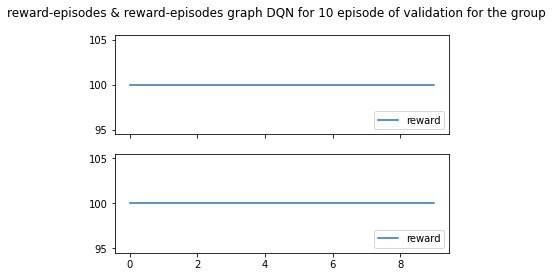

######################################
###################
169.813433
(32.0, 1.0, 16.0)
(500, 101, 40, 10, 70)
173
61
###################
validating for (500, 101, 40, 10, 70)


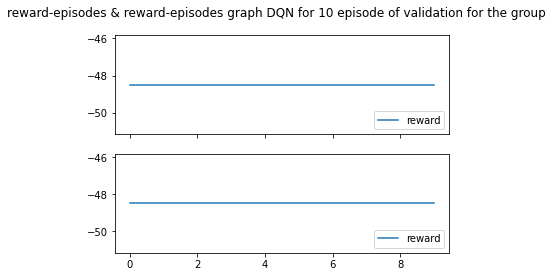

######################################
###################
86.83317143
(16.0, 1.0, 8.0)
(500, 101, 40, 10, 80)
173
61
###################
validating for (500, 101, 40, 10, 80)


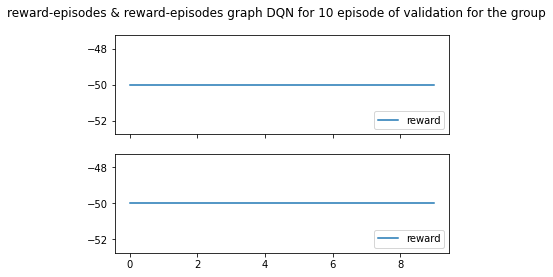

######################################
###################
192.4236015
(28.0, 1.0, 12.0)
(500, 101, 40, 10, 90)
173
61
###################
validating for (500, 101, 40, 10, 90)


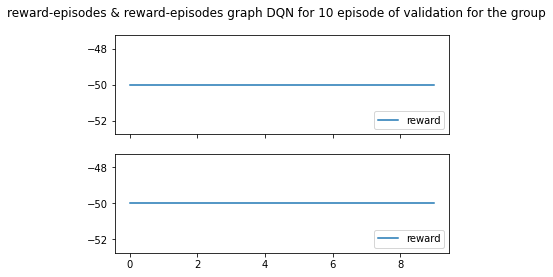

######################################
###################
7878.313223
(16.0, 1.0, 32.0)
(2500, 2, 40, 10, 30)
173
61
###################
validating for (2500, 2, 40, 10, 30)


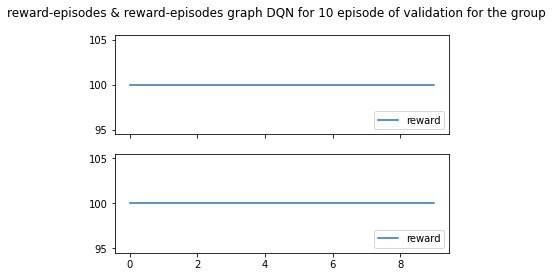

######################################
###################
8003.564626
(64.0, 1.0, 70.0)
(2500, 2, 40, 10, 40)
173
61
###################
validating for (2500, 2, 40, 10, 40)


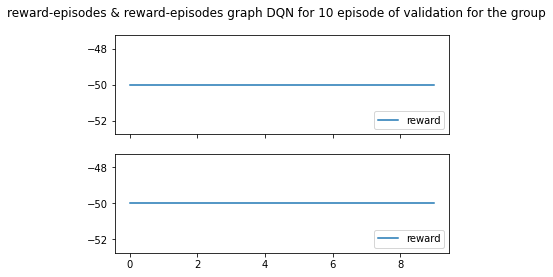

######################################
###################
4603.787974
(16.0, 1.0, 16.0)
(2500, 2, 40, 10, 50)
173
61
###################
validating for (2500, 2, 40, 10, 50)


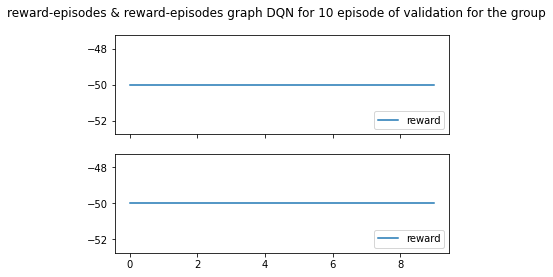

######################################
###################
3633.651565
(70.0, 1.0, 64.0)
(10000, 0, 40, 10, 30)
173
61
###################
validating for (10000, 0, 40, 10, 30)


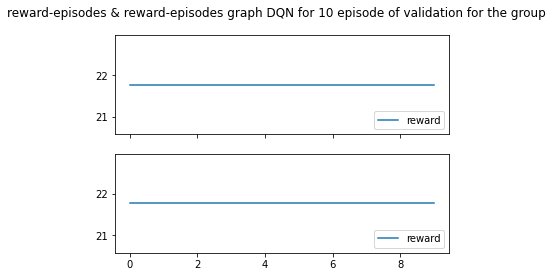

In [5]:
for i in range(0,34):
    print("######################################")
    env_validation=NetEnvironmentValidation(environmentG1,fileData_chameleon.group_keys[0:],i)
    env_validation.reset()
    print("###################")
    print(env_validation.get_max_throughput())
    print(env_validation.max_throughput_parameters)
    print(env_validation.environment_group_identification)
    print(len(env_validation.actions))
    print(len(env.states))
    print("###################")
    reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
    reward_epsilon_values=[]
    reward_epsilon_values.append(reward_per_episode_validation)
    reward_epsilon_values.append(reward_per_episode_validation)
    labels = ["reward", "reward"]
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
    for i,ax in enumerate(axs):
        axs[i].plot(reward_epsilon_values[i],label=labels[i])
        axs[i].legend(loc="lower right")
    plt.show()

In [7]:
print(agent.replay_buffer)

deque([(array([32, 35, 40, 10, 30,  1,  1,  1]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  1,  1,  2]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  1,  1,  4]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  1,  1,  8]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  1,  1, 16]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  1,  1, 32]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  2,  1,  1]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  2,  1,  2]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  2,  1,  4]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1,  8])), (array([32, 35, 40, 10, 30,  2,  1,  8]), 27, 1.0, False, array([32, 35, 40, 10, 30, 16,  1, 

In [6]:
len(agent.replay_buffer)

5882

In [8]:
agent.env.action_space.n

173

In [3]:
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:])
env.reset()
agent=DQNAgent(env,EPSILON_DECAY=100)
# t = time.time()
# agent.warming_replay_buffer_prioritize()
# print(f"warming up time is {time.time()- t} seconds")
# agent.net_tensorboard()
# t = time.time()
# agent.training_only_from_replay_buffer(TRAINING_STEPS=100000)
# print(f"training up time is {time.time()- t} seconds")

In [4]:
len(agent.online_net.net)

3

In [11]:
layer = agent.online_net.net[0]
weights = layer.weight

In [12]:
weights

Parameter containing:
tensor([[-0.3475, -0.2769, -0.0159,  ...,  0.0599,  0.3218,  0.2299],
        [-0.1603,  0.1227, -0.3347,  ...,  0.1442,  0.0453, -0.0462],
        [-0.0430, -0.1223,  0.3486,  ..., -0.3391,  0.2770, -0.0219],
        ...,
        [ 0.1383,  0.0978, -0.1784,  ..., -0.2187, -0.3158,  0.1257],
        [-0.2533, -0.2064, -0.1168,  ..., -0.0477,  0.0489,  0.1660],
        [ 0.3241,  0.1366, -0.0278,  ..., -0.2050, -0.1677, -0.0104]],
       requires_grad=True)

In [13]:
flattened_weights = weights.flatten()
flattened_weights

tensor([-0.3475, -0.2769, -0.0159,  ..., -0.2050, -0.1677, -0.0104],
       grad_fn=<ReshapeAliasBackward0>)